In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings ("ignore")


In [2]:
df=pd.read_csv(r"C:\Users\PARVEEN KUMAR\Downloads\Netflix.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [3]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


<Axes: xlabel='Date'>

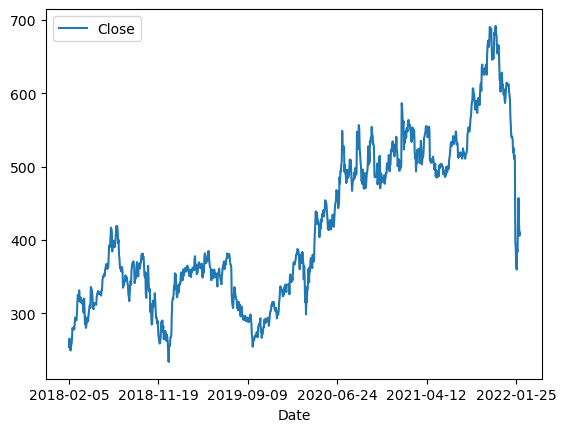

In [5]:
cls = df[['Close']]
cls.plot()

In [6]:
df1=cls.values
df1


array([[254.259995],
       [265.720001],
       [264.559998],
       ...,
       [429.480011],
       [405.600006],
       [410.170013]])

In [7]:
df1.shape

(1009, 1)

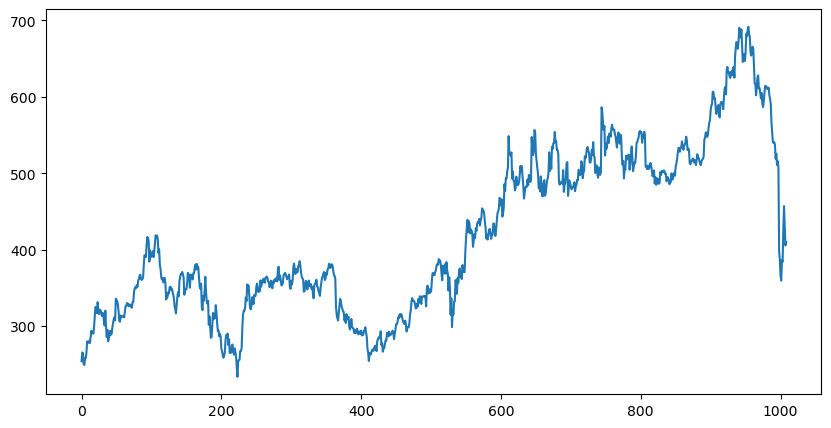

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(df1)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))


In [10]:
df1

array([[0.04451626],
       [0.06954849],
       [0.06701469],
       ...,
       [0.4272515 ],
       [0.37509011],
       [0.38507243]])

In [11]:
train_size = int(len(df1)*0.80)
test_size = len(df1) - train_size


In [12]:
train_size,test_size

(807, 202)

In [13]:
train, test = df1[0:train_size,:], df1[train_size:len(df1),:1]


In [14]:
len(train),len(test)

(807, 202)

In [15]:
def create_df(dataset,step):
    X, y = [], []
    for i in range(len(dataset)-step-1):
        ds = dataset[i:(i+step), 0]
        X.append(ds)
        y.append(dataset[i + step, 0])
    return np.array(X), np.array(y)


In [16]:
time_stamp = 100
X_train, y_train = create_df(train,time_stamp)
X_test, y_test = create_df(test,time_stamp)

In [17]:
X_train.shape,y_train.shape

((706, 100), (706,))

In [18]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [19]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [20]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [21]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=128)

Epoch 1/100
6/6 [==============================] - 15s 628ms/step - loss: 0.0843 - val_loss: 0.0327
Epoch 2/100
6/6 [==============================] - 2s 312ms/step - loss: 0.0180 - val_loss: 0.0797
Epoch 3/100
6/6 [==============================] - 2s 347ms/step - loss: 0.0135 - val_loss: 0.0481
Epoch 4/100
6/6 [==============================] - 2s 348ms/step - loss: 0.0069 - val_loss: 0.0205
Epoch 5/100
6/6 [==============================] - 2s 342ms/step - loss: 0.0058 - val_loss: 0.0299
Epoch 6/100
6/6 [==============================] - 2s 325ms/step - loss: 0.0046 - val_loss: 0.0191
Epoch 7/100
6/6 [==============================] - 2s 314ms/step - loss: 0.0038 - val_loss: 0.0191
Epoch 8/100
6/6 [==============================] - 2s 323ms/step - loss: 0.0035 - val_loss: 0.0182
Epoch 9/100
6/6 [==============================] - 2s 316ms/step - loss: 0.0035 - val_loss: 0.0205
Epoch 10/100
6/6 [==============================] - 2s 311ms/step - loss: 0.0034 - val_loss: 0.0177
Epoch 11

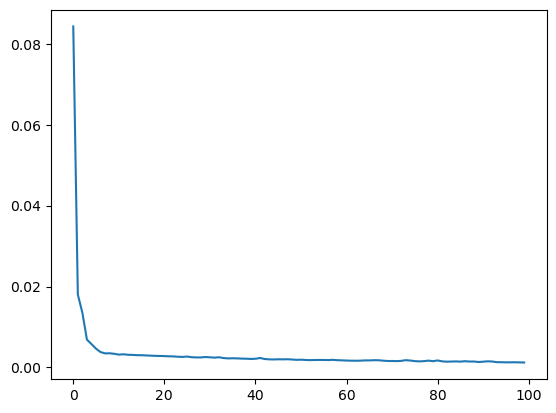

In [23]:
loss = model.history.history['loss']
plt.plot(loss)

In [24]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

4/4 [==============================] - 0s 32ms/step


In [25]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

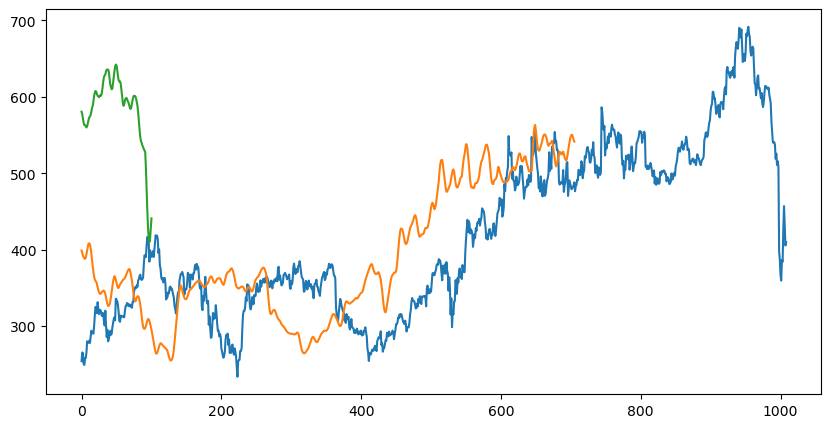

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(scaler.inverse_transform(df1))
plt.plot(train_predict)
plt.plot(test_predict)

In [27]:
test = np.vstack((train_predict,test_predict))

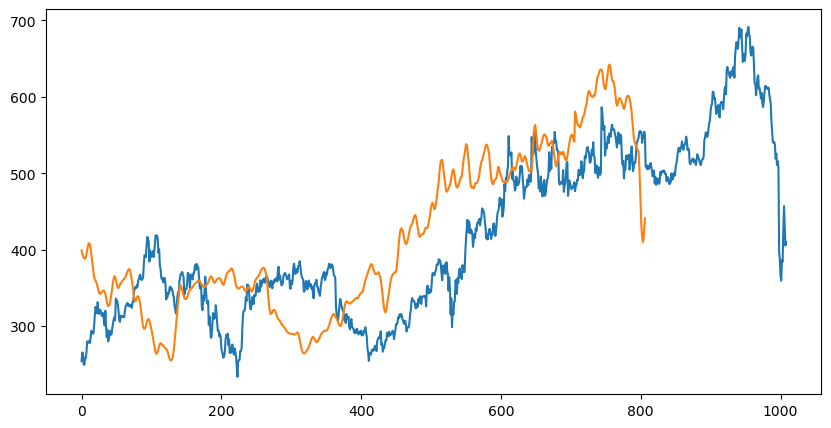

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(scaler.inverse_transform(df1))
plt.plot(test)

In [29]:
len(test)

807

In [30]:
fut_inp = test[707:]
fut_inp = fut_inp.reshape(1,-1)
fut_inp.shape

(1, 100)

In [31]:
tmp_inp = list(fut_inp)

In [32]:
tmp_inp = tmp_inp[0].tolist()

In [33]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[2.3070590496063232], [2.2239978313446045], [2.177271604537964], [2.127110004425049], [2.085700511932373], [2.0540781021118164], [2.031588554382324], [2.0137102603912354], [1.9871267080307007], [1.9331023693084717], [1.840264916419983], [1.719303846359253], [1.5880826711654663], [1.4603322744369507], [1.3462063074111938], [1.2519479990005493], [1.1782196760177612], [1.1203913688659668], [1.0725045204162598], [1.0304206609725952], [0.9919857382774353], [0.956346333026886], [0.923439621925354], [0.8935353755950928], [0.8669142127037048], [0.8437883853912354], [0.824341356754303], [0.8087577223777771], [0.7972077131271362], [0.7898021340370178]]


In [34]:
len(df1)

1009

In [35]:
plot_new=np.arange(1,101)
plot_pred=np.arange(101,131)

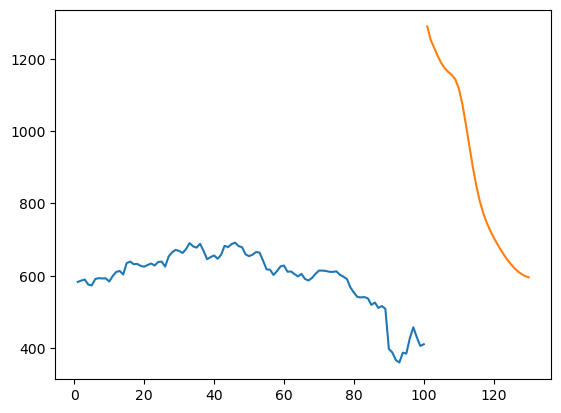

In [36]:
plt.plot(plot_new, scaler.inverse_transform(df1[909:]))
plt.plot(plot_pred, scaler.inverse_transform(lst_output))

In [37]:
ds_new = df1.tolist()

In [38]:
len(ds_new)

1009

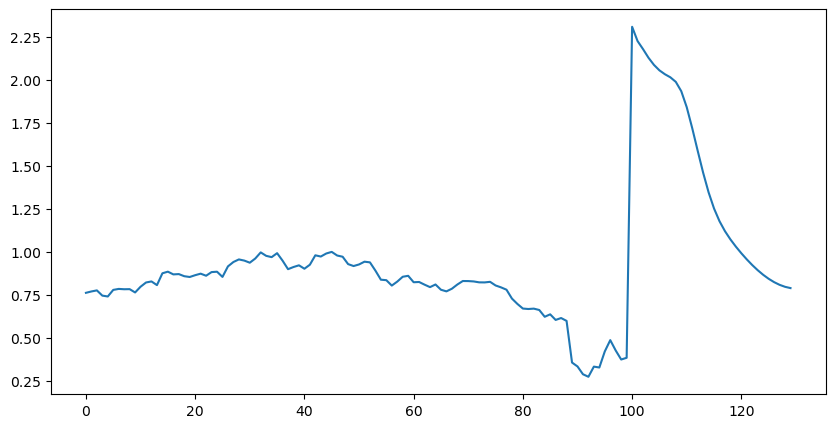

In [39]:
plt.figure(figsize=(10, 5))
ds_new.extend(lst_output)
plt.plot(ds_new[909:])

In [40]:
final_graph = scaler.inverse_transform(ds_new).tolist()


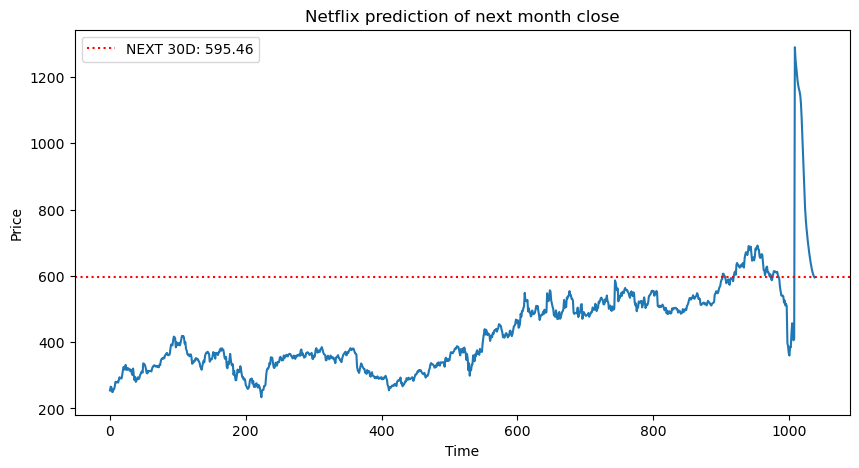

In [41]:
plt.figure(figsize=(10, 5))
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("Netflix prediction of next month close")
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()